# Frequency spektrum of didgeridoo sound files

from https://klyshko.github.io/teaching/2019-02-22-teaching

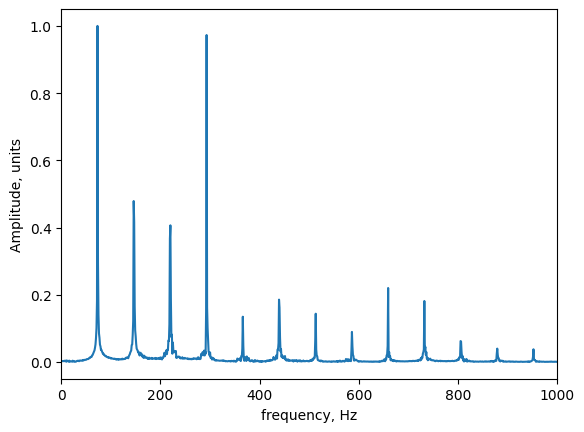

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import argrelextrema

def do_fft(infile):
    sampFreq, sound = wavfile.read(infile)
    #sound = sound / 2.0**15
    signal = sound[:,0]
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

    fft_spectrum_abs = np.abs(fft_spectrum)
    fft_spectrum_abs /= fft_spectrum_abs.max()
    return freq, fft_spectrum_abs

freq, fft_spectrum_abs = do_fft("samples/saxo_smooth.wav")
plt.xlim((0,1000))
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()


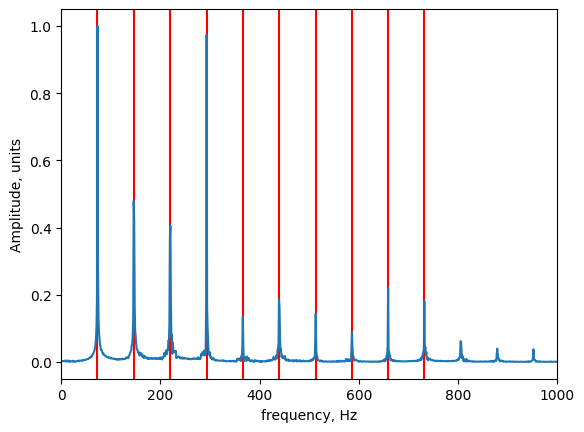

In [3]:
# filter for peaks

def get_maxima(freq, signal, n):

    max_indizes = np.array(argrelextrema(fft_spectrum_abs, np.greater)[0])
    max_indizes = sorted(max_indizes, key=lambda x : fft_spectrum_abs[x])
    i_maxima = max_indizes[-1*n:]
    maxima = [freq[m] for m in i_maxima]
    maxima = sorted(maxima)
    return maxima, i_maxima

maxima, _ = get_maxima(freq, fft_spectrum_abs, 10)
for m in maxima:
    plt.axvline(x=m, color="red")

plt.xlim((0,1000))
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")

plt.show()


In [4]:
import sys
import pandas as pd
sys.path.append('../../')
from cad.calc.conv import freq_to_note_and_cent, note_name

def get_overtones_from_wav(infile):
    freq, fft_spectrum_abs = do_fft(infile)
    maxima, i_maxima = get_maxima(freq, fft_spectrum_abs, 10)
    df = []
    for i in range(len(maxima)):
        note_number, cent_diff = freq_to_note_and_cent(maxima[i])
        df.append([maxima[i], note_number, note_name(note_number), cent_diff, fft_spectrum_abs[i_maxima[i]]])

    df = pd.DataFrame(df, columns=["freq", "note_number", "note", "cent_diff", "amp"])
    return df

get_overtones_from_wav("samples/saxo_smooth.wav")

,freq,note_number,note,cent_diff,amp
0,73.0,-31,D1,9.842186,0.089272
1,146.0,-19,D2,9.842186,0.134529
2,220.0,-12,A3,0.000000,0.143450
3,293.0,-7,D3,3.923431,0.181355
4,366.0,-3,F#3,18.791850,0.185365
5,439.0,0,A4,3.939101,0.220006
6,513.0,3,C4,34.253638,0.406505
7,586.0,5,D4,3.923431,0.478806
8,659.0,7,E4,0.670070,0.972900
9,732.0,9,F#4,18.791850,1.000000


In [5]:
get_overtones_from_wav("samples/saxo_lucky_minor.wav")

,freq,note_number,note,cent_diff,amp
0,73.0,-31,D1,9.842186,0.012070
1,146.0,-19,D2,9.842186,0.014059
2,220.0,-12,A3,0.000000,0.007168
3,293.0,-7,D3,3.923431,0.005285
4,366.0,-3,F#3,18.791850,0.023594
5,439.0,0,A4,3.939101,0.002455
6,513.0,3,C4,34.253638,0.092610
7,586.0,5,D4,3.923431,0.098939
8,659.0,7,E4,0.670070,0.058911
9,732.0,9,F#4,18.791850,0.364130


In [6]:
get_overtones_from_wav("samples/saxo_major.wav")

,freq,note_number,note,cent_diff,amp
0,58.4,-35,A#1,-3.844101,0.001561
1,116.8,-23,A#2,-3.844101,0.045836
2,176.0,-16,F2,-13.686286,0.002496
3,234.4,-11,A#3,-9.762855,0.001778
4,292.8,-7,D3,5.105564,0.015711
5,351.2,-4,F3,-9.747185,0.001218
6,410.4,-1,G#3,20.567351,0.007014
7,468.8,1,A#4,-9.762855,0.003164
8,527.2,3,C4,-13.016216,0.006185
9,585.6,5,D4,5.105564,0.018240


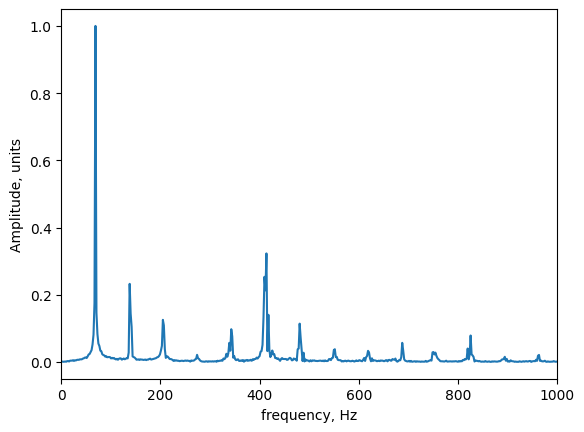

In [146]:
#get_overtones_from_wav('samples/harmonic_wobbler_s_molder_e.wav')
freq, fft_spectrum_abs = do_fft("samples/singer.wav")
plt.xlim((0,1000))
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()


In [147]:
get_overtones_from_wav("samples/singer.wav")

,freq,note_number,note,cent_diff,amp
0,68.937025,-32,C#1,8.983083,0.097348
1,137.874051,-20,C#2,8.983083,0.113915
2,204.841447,-13,G#2,23.595041,0.125214
3,342.715498,-4,F3,32.590508,0.140233
4,409.682894,-1,G#3,23.595041,0.232365
5,413.622153,-1,G#3,7.028082,0.253356
6,417.561411,-1,G#3,-9.381842,0.322874
7,480.589549,2,B4,47.237898,1.000000
